
# Project: Investigating the Trends and Features of a Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The purpose of this project is to analyze a database of movies from TMDb. The databse includes more than 10,000 entries, and has the potential of giving rich insights on the movie industry.

General features included in the database includes the revenue and budget of the movies, the cast, directors, and ratings.
This gives a general framework of the questions that could be asked of the relationship between the different features and main ones such as ratings and budgets.

However, the specific questions will be provided after exploring and cleaning the data below to have a better understanding.


**We will start the project by importing the necessary libraries and files**

In [67]:
# Importing the Python libraries needed for analyzing the database (Pandas, Numpy, and Matplotlib)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

As a start, we will load the database CSV file to a Pandas dataframe.

In [68]:
df=pd.read_csv('tmdb-movies.csv') #importing the databse as a dataframe
df.head() #viewing the head of the dataframe for general idea about the available data



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Observations

Not all columns are shown in the sample, however, there are few comments to make, looking at the data sample:

 - **id and imdb_id:** the values do not tell much (they are most likely primary key of another database) dropping them is an option.
 - **cast:** the more than one value are available in one cell and are divided by a pipe "|", dividing them to separate rows is an option
 - **homepage:** irrelevant for any analysis, can be dropped
 - **tagline and overview:** unique for every movie, irrelevant for any analysis and can be dropped.
 - **genres and production_companies:** the data is also divided by a pipe, can be divided into separate entries. although the database will be too large
 - **release_date:**  apparently it is not in date format, can be fixed if details on quarter/month were needed
 - **budget, revenue, budget_adj, revenue_adj:** the numbers are big (in millions) might consider dividing the number by 1,000,000 and rounding it up. The original budget and revenue values can be dropped since the adjusted to inflation one should suffice. 

In [69]:
df.shape #seeing the size of the dataframe

(10866, 21)

**database size:** there are 10866 rows, which is can be issue when dividing the columns mentioned earlier

In [70]:
df.info() #seeing the list of columns, missing data, and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**Observations**

 - the release date is indeed shown as an object (string) will have to be parsed or as a proper date or converted.
 - there are missing values in a number of columns
	 - cast (might be an issue if analysis was to be made on specific cast member)
	 - director (might be useful, the number missing is small. Nulls can be removed)
	 - genres (might be useful, the number missing is small. Nulls can be removed)
	 - imdb_id (feature unimportant)
	 - tagline (feature unimportant)
	 - keywords (feature unimportant)
	 - overview (feature unimportant)
	 - production_companies (feature might be useful, however a good number -9.5%- of records are missing, can be dropped at the meantime)


In [71]:
df.describe() #a general description of the numrical data in the database

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The descriptions is a bit vague at the moment, might be better to revisit after cleaning the data more.

### Data Cleaning Steps

Following the observations reported earlier, a number of actions are to be taken to improve the readability and accessibility of the data for analysis.

**In particular:**

 1. Deleting unnecessary columns
 2. Changing the types of some columns
 3. Splitting some columns


In [72]:
#1. Deleting unneccary columns
df.drop(['id','imdb_id','homepage','keywords','tagline','overview','budget','revenue'],axis=1,inplace=True)

In [73]:
df.head(1)
#columns were deleated

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [74]:
#changing release_date to date format
df.release_date=pd.to_datetime(df['release_date'])
df.info()
#column was changed to datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 1.1+ MB


In [75]:
#changing the budget_adj and revenue_adj to be multiples of 1,000,000
df.budget_adj=df.budget_adj/1000000
df.revenue_adj=df.revenue_adj/1000000



In [76]:
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137.999939,1392.445893


In [77]:
#much readable, but rounding the number to 2 decimal places might be even more clear
df.budget_adj=df.budget_adj.round(2)
df.revenue_adj=df.revenue_adj.round(2)
#and renaming the columns
df.rename({'budget_adj':'budget_adj_m','revenue_adj':'revenue_adj_m'},axis='columns',inplace=True)
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj_m,revenue_adj_m
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,138.0,1392.45


In [78]:
#let's add a profit column
df['profit']=df.revenue_adj_m - df.budget_adj_m
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj_m,revenue_adj_m,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,138.0,1392.45,1254.45


In [79]:
# Exploring if there are any duplicated columns
df.duplicated().sum()

1

There is one duplicated column, which can be dropped.

In [80]:
#dropping the duplicated

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Duplicate was removed

In [81]:
#counting null values, and possible options to deal with them.
df.isnull().sum()

popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj_m               0
revenue_adj_m              0
profit                     0
dtype: int64

The director field is the only field with nulls that will be important for this analysis. Null values will be dropped since the number is relatevly small, and that they cannot be filled with average values (it is a string)

In [82]:
df.dropna(subset = ['director'],inplace=True)

In [83]:
df.isnull().sum()

popularity                 0
original_title             0
cast                      70
director                   0
runtime                    0
genres                    21
production_companies    1007
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj_m               0
revenue_adj_m              0
profit                     0
dtype: int64

The director field is now clean

In [84]:
#dividing the genres and production_companies columns
#df['genres']=df['genres'].str.split("|")
#df['production_companies']=df['production_companies'].str.split("|")
#df['cast']=df['cast'].str.split("|")
#df.head()


#The split gave a list in each column, splitting it further into differnt rows will enlarge the dataset,
# and causes some difficulties with functions that cannot deal with lists,
# so they will not be included in the scope of this analysis.

In [85]:
#reloading the description of the dataframe after the cleaning up
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj_m,revenue_adj_m,profit
count,10821.000000,10821.000000,10821.000000,10821.000000,10821.000000,10821.000000,10821.000000,10821.000000
mean,0.648530,102.130302,218.211810,5.971509,2001.294890,17.620140,51.576836,33.956695
std,1.001704,30.872755,576.672383,0.933671,12.819687,34.359427,144.895228,125.454976
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000,0.000000,-413.910000
25%,0.209036,90.000000,17.000000,5.400000,1995.000000,0.000000,0.000000,0.000000
50%,0.385121,99.000000,38.000000,6.000000,2006.000000,0.000000,0.000000,0.000000
75%,0.716336,111.000000,146.000000,6.600000,2011.000000,20.990000,33.980000,13.200000
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,425.000000,2827.120000,2750.130000


**Data Cleaning Conclusion**:

The data now seems to be relatively clean compared to the original dataset. 
We can now proceed with doing actual analysis

<a id='eda'></a>
## Exploratory Data Analysis

Now that the data has been cleaned, we can proceed with asking specific questions to explore. I will consider the following:
- Research Question 1: Has Budgets and spending on movie production pattern changed since 1960 (first record)?
- Research Question 2: Is there a relation between the budget spent on a movie and overall vote (rating)?


### Research Question 1: Has Budgets and spending on movie production pattern changed since 1960 (first record)?

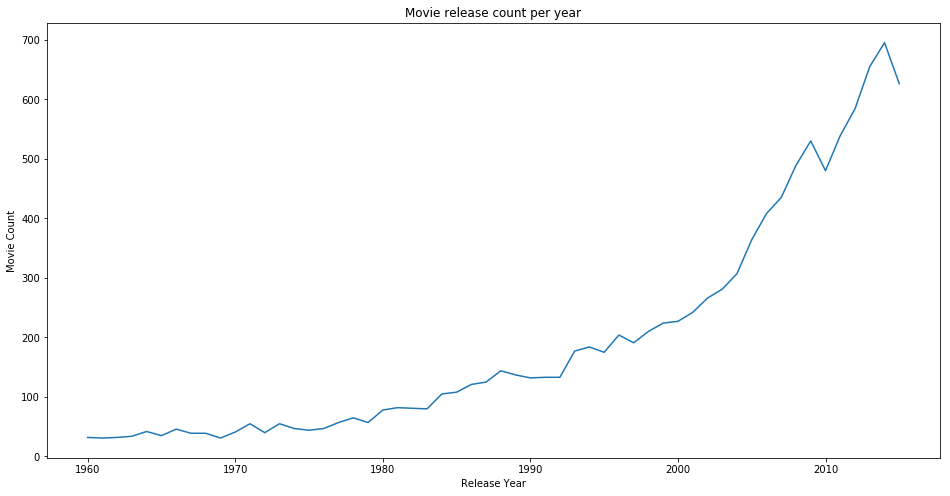

In [86]:
#let's first explore the trend of movie release across the years

movie=df.groupby('release_year')['budget_adj_m'] #defining grouping by year

movie.count() #count by release year

movie.count().plot(kind='line', figsize=(16,8)); #plotting bar chart
plt.title('Movie release count per year')
plt.xlabel('Release Year')
plt.ylabel('Movie Count');

The data shows that there has been a steady increase in the number of production per year since  the 1960, prehaps a sign that people now look more for entertainment.

Let's see how budgets and spending on movie production has changed across the years

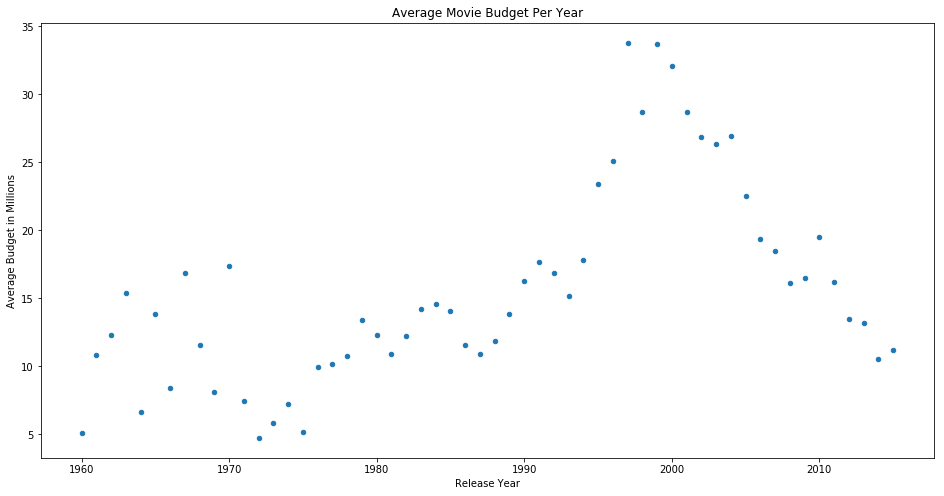

In [87]:
#looking at average budget in general across the years
movie.mean().reset_index(name='avg_budget_m').plot(kind='scatter',x='release_year',y='avg_budget_m', figsize=(16,8))
plt.title('Average Movie Budget Per Year')
plt.xlabel('Release Year')
plt.ylabel('Average Budget in Millions');

The figure shows an interesting trend in average budget spent. The priod from 1985 to 2000 saw an increase in spending on films, while increase in production numbers as shown in the earlier bar chart. However, the tremd reverses back to 1960-1970 averages while releasing more movies (more in total was spent). The steep decline in 2008-2010 can be associated with the last financial crises.

However, this aggregate might cover some facts. Let's look at the scatterplot for all movies and all budgets

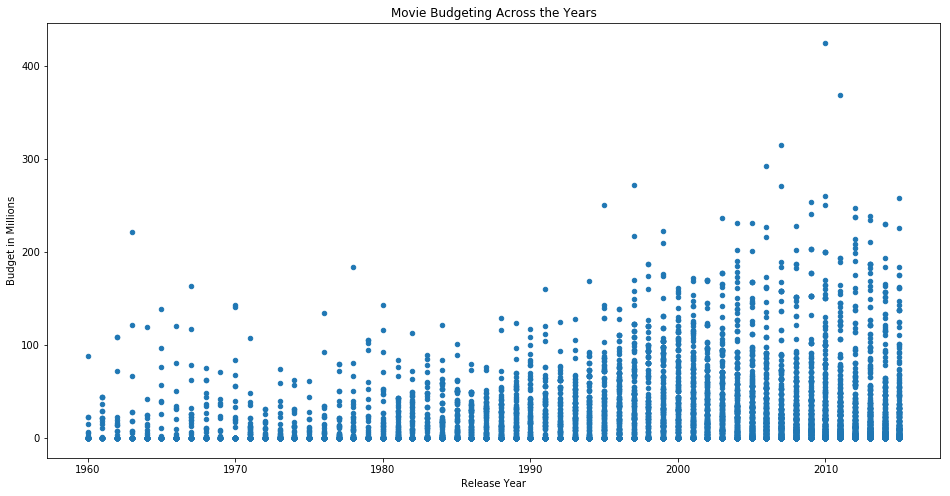

In [88]:
df.plot(kind='scatter',x='release_year',y='budget_adj_m', figsize=(16,8))
plt.title('Movie Budgeting Across the Years')
plt.xlabel('Release Year')
plt.ylabel('Budget in Millions');

This scatter plot figure shows indeed that looking only on aggregated average might be a bit deceiving, since while the average budgets in 2000 onwards was declining, there were indeed many movies with 100m+ budgets, although offset by lower budget movies.

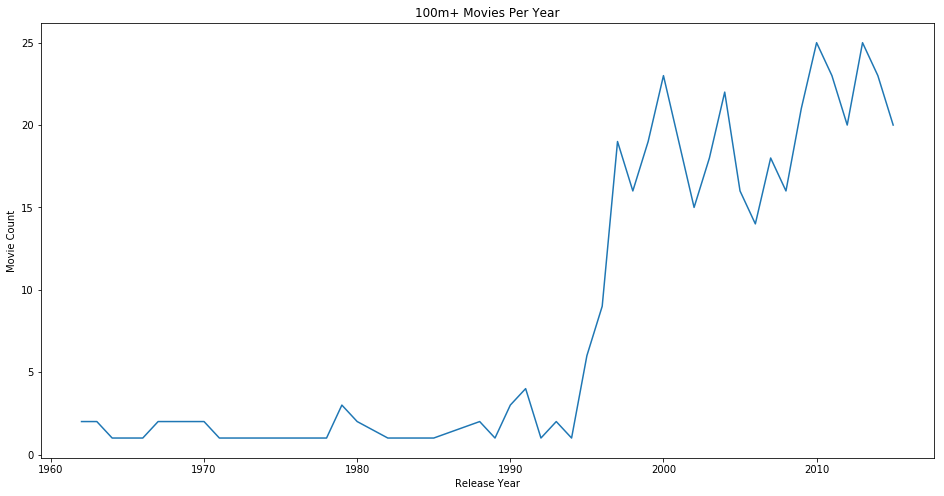

In [89]:
movies_100m=df.query('budget_adj_m>100') #defining movies with 100m+ budget
movies_100m.groupby('release_year')['budget_adj_m'].count().plot(kind='line', figsize=(16,8))
plt.title('100m+ Movies Per Year')
plt.xlabel('Release Year')
plt.ylabel('Movie Count');

The above line chart illustrates point highlighted in the previous remark.

**Therefore, although the average budgeting for movies in the 2000-2015 is close to the 1960s average, theere are more mega-movies (with 100m+ budgets) released since the 1997. The low average is due to higher number of movies released with lower budgets**

### Research Question 2: Is there a relation between the budget spent on a movie and overall vote (rating)?

In order to build an intuition about the general data, let's look at the rating distribution for all movies.

In [90]:
#let's see general description of the voting average
df.vote_average.describe()

count    10821.000000
mean         5.971509
std          0.933671
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

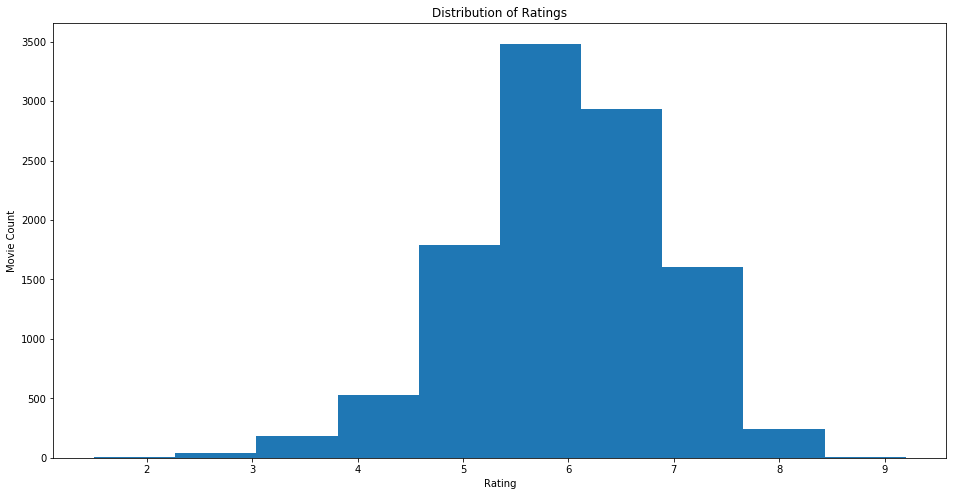

In [91]:
#plotting the vote average on a hitogram
df.vote_average.plot(kind='hist',figsize=(16,8))
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Movie Count');

Looking at the general ratings, they appear to be following a normal distribution, with the average at 6. Let's now look at the relationship betweeen voting socre average and the average budget.

''

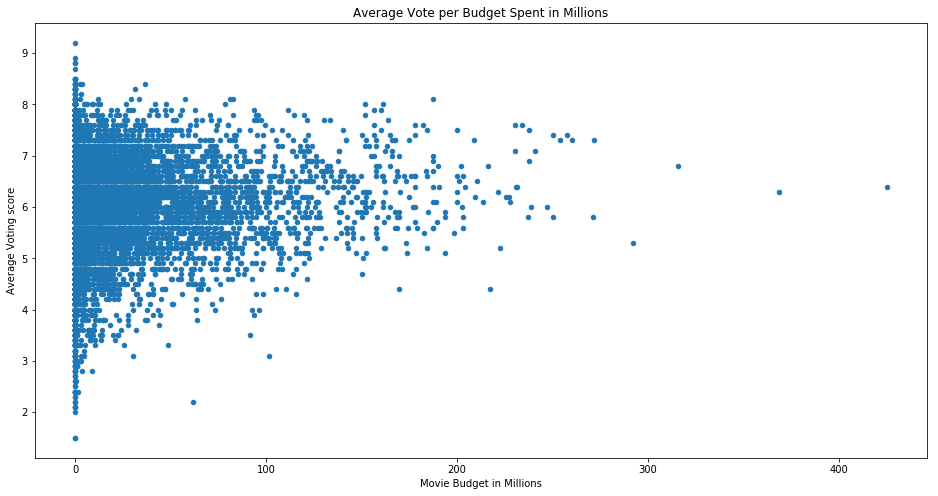

In [92]:
#plotting a scatter plot of the budget against vote average
df.plot(kind='scatter',x='budget_adj_m',y='vote_average',figsize=(16,8))
plt.title('Average Vote per Budget Spent in Millions')
plt.xlabel('Movie Budget in Millions')
plt.ylabel('Average Voting score')
;


The shape of the scatter plot shows that the movies with bigger budget tend to have a better chance to score a rating near the overall vote mean (5.97), with a general lower standard deviation from looking at the shape of the plot, although it is no guarantee that it would reach the high scores of 8+, which are minimal.

Let's look at only those with 8+ voting average

''

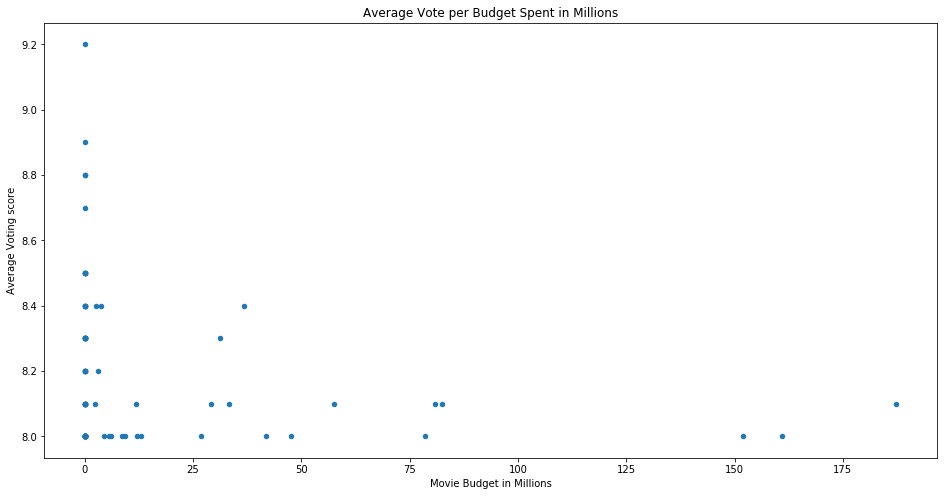

In [93]:
#plotting only those with 8+ votes
df.query('vote_average>=8').plot(kind='scatter',x='budget_adj_m',y='vote_average', figsize=(16,8))
plt.title('Average Vote per Budget Spent in Millions')
plt.xlabel('Movie Budget in Millions')
plt.ylabel('Average Voting score')
;

Looking at the scatter plot above, it seems that moves with lower budgets (<25m) are the ones likely to get a high rating of 8+.

**Therfore, our analysis shows that while bigger budgets due tend have a better chance of making a good movie on average, a higher budget does not guarantee that the movie will be among the best critically acclaimed by the public.**

<a id='conclusions'></a>
## Conclusions

After cleaning the data for easier data analysis, including chaning the format and removal of columns, the two questions were addressed.

This analysis posed two questions based on the movies database:
- Research Question 1: Has Budgets and spending on movie production pattern changed since 1960 (first record)?
- Research Question 2: Is there a relation between the budget spent on a movie and overall vote (rating)?


**Has Budgets and spending on movie production pattern changed since 1960 (first record)?**

The analysis first showed to us that there has been a big jump in overall movie production in terms of movie count since the 1960, growing sevenfolds by the 2000s. 

Although the average budgets in the 2000s is close to the 1960-70s figure (following a steep drop since 1999/2000), this is largely driven by the increased production of low budget movies which brings the average down.

However, the number of mega-films, those with budgets of 100m+ sharply increased since the mid 1990s.



**Is there a relation between the budget spent on a movie and overall vote (rating)?**

This questions was thought after seeing the result of the first one. Does higher budgeting result in overall better perception by the public? Taking into conisderation that the rating is normally distributed around an average of 6.

The data shows that, generally, the higher the budget spent on a movie the more likley that it scores around the average score of 6 (in the 5-8 range) with few outliers.

However, looking only at those movies with scores >=8, the data shows that, actually, movies with lower budgets (<=25m) seem to be more likely to achieve a high average rating of 8+.













## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [94]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0